In [1]:
""" Implementation of a 2D filter (Box Filter, Laplacian Filter) on an 8-bit gray scale image
            
    Platform: Python 3 """    

' Implementation of a 2D filter (Box Filter, Laplacian Filter) on an 8-bit gray scale image\n            \n    Platform: Python 3 '

In [2]:
"""
Brief Description on Correlation & Spatial Filter (Linear filtering):

Correlation: Process of moving a filter-mask over an image and computing
            the sum of products (S.O.P) at each location.
            
            Correlation is a function of displacement of the filter.
            
            In other words, the first value of correlation corresponds to
            zero displacement of the filter, the second value of correlation
            corresponds to one unit displacement, and so on.
            
            Correlation of a function with a discrete unit-impulse yields
            a rotated version of the function at the location of the impulse.
            

Spatial Filter: Spatial filters are used for image enhancement.
                
                Filtering refers to accepting (passing) or rejecting
                certain frequuency components.
                
                A filter passing low frequencies is called a lowpass filter,
                which is used to blur/smooth an image.
                
                We can accomplish smoothing directly on image itself using
                spatial filters like, linear filters: box-filter.
                
                A spatial filter consists of a neighborhood and a predefined operation
                that is performed on the image pixels encompassed by the neighborhood.
                
               
"""

'\nBrief Description on Correlation & Spatial Filter (Linear filtering):\n\nCorrelation: Process of moving a filter-mask over an image and computing\n            the sum of products (S.O.P) at each location.\n            \n            Correlation is a function of displacement of the filter.\n            \n            In other words, the first value of correlation corresponds to\n            zero displacement of the filter, the second value of correlation\n            corresponds to one unit displacement, and so on.\n            \n            Correlation of a function with a discrete unit-impulse yields\n            a rotated version of the function at the location of the impulse.\n            \n\nSpatial Filter: Spatial filters are used for image enhancement.\n                \n                Filtering refers to accepting (passing) or rejecting\n                certain frequuency components.\n                \n                A filter passing low frequencies is called a lowpass filter

In [3]:
"""
Here, 
        Input: 8-bit gray scale images
        Output: Smoothed/blurred image (for box kernel) 
        and sharpened edged image (for laplacian filter)
"""

'\nHere, \n        Input: 8-bit gray scale images\n        Output: Smoothed/blurred image (for box kernel) \n        and sharpened edged image (for laplacian filter)\n'

In [4]:
""" Importing necessary libraries for computation """

from skimage.io import imread, imshow
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
""" Loading image in the original color format: 
For this, have to set the parameter ‘as_gray’ to False: """

' Loading image in the original color format: \nFor this, have to set the parameter ‘as_gray’ to False: '

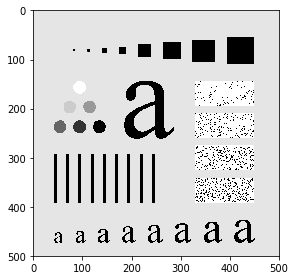

In [6]:
image1 = imread('\\a.jpg',as_gray = False)

imshow(image1);

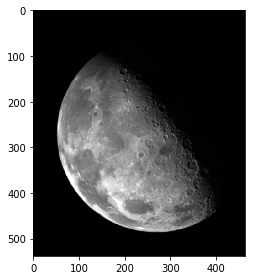

In [7]:
image2 = imread('\\moon.jpg',as_gray = False)

imshow(image2);

In [8]:
def sum_of_coeff(matrix):
    sum = 0
    for i in range(len(matrix)):
        for j in range(len(matrix)):   
            sum += matrix[i][j]
    return sum

In [9]:
"""
Blurring is
used in preprocessing tasks, such as removal of small details from an image
prior to object extraction, and bridging of small gaps in lines or curves.
Noise reduction can be accomplished by blurring with a linear filter and also
by nonlinear filtering.

Box filtering is a simple linear method of smoothing images, 
i.e. reducing the amount of intensity variation between one pixel 
and the next one. It is often used to reduce noise/blur images.
blurring can be done in spatial domain by pixel averaging
in a neighbrhood.

A box linear filter) is a spatial domain linear filter in which 
each pixel in the resulting image has a value equal to 
the average value of its neighboring pixels in the input image. 

It is a form of low-pass ("blurring") filter.

The constant multiplier in front of each mask is equal to the 
sum of values of its coefficients, as is required to compute an average.
                
Dimensions of the kernel needs to be same or lower than the dimensions
of the original image.

"""

'\nBlurring is\nused in preprocessing tasks, such as removal of small details from an image\nprior to object extraction, and bridging of small gaps in lines or curves.\nNoise reduction can be accomplished by blurring with a linear filter and also\nby nonlinear filtering.\n\nBox filtering is a simple linear method of smoothing images, \ni.e. reducing the amount of intensity variation between one pixel \nand the next one. It is often used to reduce noise/blur images.\nblurring can be done in spatial domain by pixel averaging\nin a neighbrhood.\n\nA box linear filter) is a spatial domain linear filter in which \neach pixel in the resulting image has a value equal to \nthe average value of its neighboring pixels in the input image. \n\nIt is a form of low-pass ("blurring") filter.\n\nThe constant multiplier in front of each mask is equal to the \nsum of values of its coefficients, as is required to compute an average.\n                \nDimensions of the kernel needs to be same or lower th

In [10]:
def make_box_filter(row, column):
    box = np.ones( (row, column) )
    box_filter = (1/sum_of_coeff(box)) * box
    return box_filter

In [11]:
def compare_matrix(mat1, mat2):
    flag = False
    if mat1.shape == mat2.shape:
        for i, j in enumerate(mat1):
            check_all = list( set( filter(lambda x: True if x else False, [i==k for i,k in zip(j, mat2[i]) ])))
            if check_all and len(check_all)==1 and check_all[0]:
                continue
            else:
                return flag
        flag = True
    return flag

In [12]:
def flip_horizontally(matrix):
    return matrix[:, ::-1]

In [13]:
def flip_vertically(matrix):
    return matrix[::-1]

In [14]:
""" method to apply convolution on a pixel representation of an image: """

# method for weighted sum
def weighted_sum(mat1, mat2):
    sum = 0
    for i, j in enumerate(mat1):
        for a, b in zip(j, mat2[i]):
            sum += a*b
    return sum


""" method for padding """
def padding(matrix, pad_dimension):
    """ padding dimension == a sequence of 2 length """
    old_dimension = matrix.shape
    new_dimension = ( pad_dimension[0]*2 + old_dimension[0], 
                    pad_dimension[1]*2 + old_dimension[1] )
    new_matrix = np.zeros(new_dimension)
    new_matrix[ pad_dimension[0]: pad_dimension[0]+old_dimension[0],
               pad_dimension[1]: pad_dimension[1]+old_dimension[1] ] = matrix
    return matrix




In [15]:
"""
Convolution:
Sliding the kernel matrix over each pixel of the original image
one step at a time.
This has to be done in such a way that the center of the kernel matrix
is on top of the pixel in question for the original image.
This is perhaps why kernel matrices are usually odd-dimension matrices.

"""

'\nConvolution:\nSliding the kernel matrix over each pixel of the original image\none step at a time.\nThis has to be done in such a way that the center of the kernel matrix\nis on top of the pixel in question for the original image.\nThis is perhaps why kernel matrices are usually odd-dimension matrices.\n\n'

In [16]:
def convolution(input_image, kernel):
    stride = 1
    w = flip_vertically(flip_horizontally(kernel))
    dim_input_image = input_image.shape
    dim_kernel = w.shape
    
    dim_kernel_center = (math.floor((dim_kernel[0]- 1 )/2),math.floor((dim_kernel[1]- 1 )/2))

    pad_dimension = dim_kernel_center
    
    dim_output_matrix = (math.floor((dim_input_image[0] + 2* pad_dimension[0] - dim_kernel[0])/stride) +1, \
                            math.floor((dim_input_image[1] + 2* pad_dimension[1] - dim_kernel[1])/stride)+1)
    
    output_matrix = np.zeros(dim_output_matrix)
    padded_matrix = padding(input_image, pad_dimension)
    
    rstep = 0
    
    for r in range(dim_output_matrix[0]):
        step = 0
        for c in range(dim_output_matrix[1]):
            output_matrix[r,c] = weighted_sum(padded_matrix[ rstep:dim_kernel[0]+ rstep , step : dim_kernel[1] + step ], w)
            step += stride
        rstep += stride
    return output_matrix

In [17]:
box_filter = make_box_filter(3,3)
box_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [18]:
blurred_img1 = convolution(image1, box_filter)

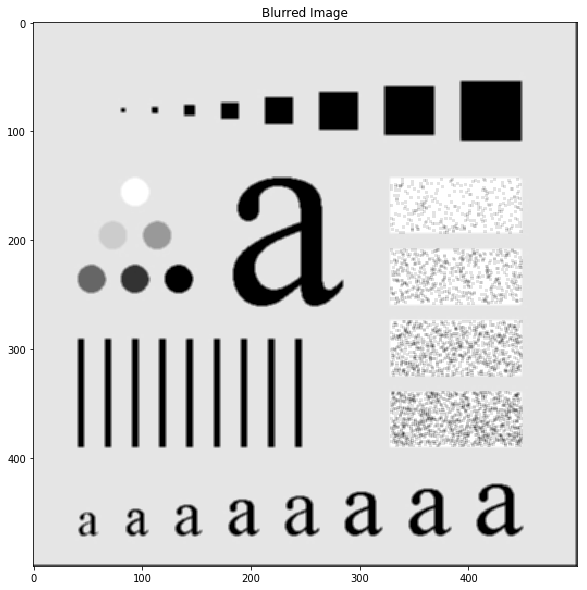

In [19]:
plt.figure(figsize=(10,10))
plt.title('Blurred Image')
plt.imshow(blurred_img1, cmap = "gray");

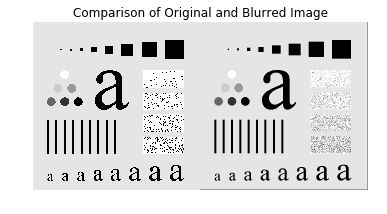

In [20]:
result = np.hstack((image1,blurred_img1))
plt.title("Comparison of Original and Blurred Image")
plt.axis('off')
plt.imshow(result, cmap = "gray");

In [21]:
blurred_img2 = convolution(image2, box_filter)

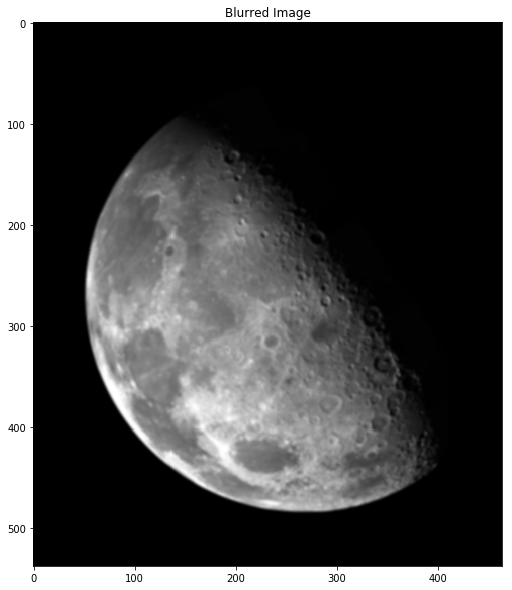

In [22]:
plt.figure(figsize=(10,10))
plt.title('Blurred Image')
plt.imshow(blurred_img2, cmap = "gray");

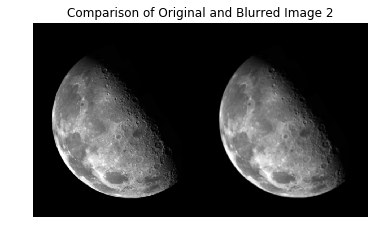

In [23]:
result2 = np.hstack((image2,blurred_img2))
plt.title("Comparison of Original and Blurred Image 2")
plt.axis('off')
plt.imshow(result2, cmap = "gray");

In [24]:
image1

array([[229, 229, 229, ..., 229, 255, 255],
       [229, 229, 229, ..., 229, 229, 229],
       [229, 229, 229, ..., 229, 229, 229],
       ...,
       [229, 229, 229, ..., 229, 230, 229],
       [229, 229, 229, ..., 230, 229, 229],
       [229, 229, 229, ..., 229, 229, 254]], dtype=uint8)

In [25]:
image2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:
blurred_img1

array([[229.        , 229.        , 229.        , ..., 234.77777778,
        158.44444444,  79.22222222],
       [229.        , 229.        , 229.        , ..., 229.        ,
        152.66666667,  76.33333333],
       [229.        , 229.        , 229.        , ..., 229.11111111,
        152.77777778,  76.33333333],
       ...,
       [229.        , 229.        , 229.        , ..., 232.        ,
        155.55555556,  79.11111111],
       [152.66666667, 152.66666667, 152.66666667, ..., 155.55555556,
        104.55555556,  53.66666667],
       [ 76.33333333,  76.33333333,  76.33333333, ...,  79.11111111,
         53.66666667,  28.22222222]])

In [27]:
blurred_img2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
box_filter2 = make_box_filter(5,5)
box_filter2

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [29]:
blurred_img12 = convolution(image1, box_filter2)

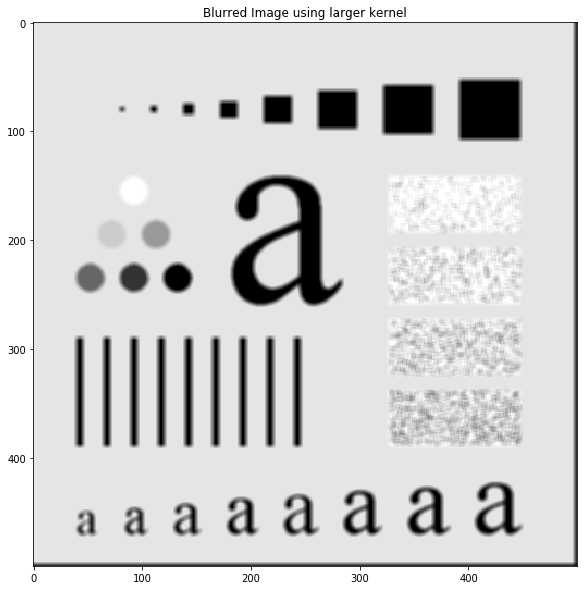

In [30]:
plt.figure(figsize=(10,10))
plt.title('Blurred Image using larger kernel')
plt.imshow(blurred_img12, cmap = "gray");

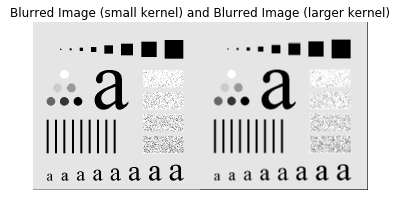

In [31]:
result = np.hstack((blurred_img1, blurred_img12))
plt.title("Blurred Image (small kernel) and Blurred Image (larger kernel)")
plt.axis('off')
plt.imshow(result, cmap = "gray");

In [32]:
"""
Effects of Changing the size of the box filter:
The fine-grain noise is more pronounced when using larger box kernels.
Big mask is used to eliminate small objects from an image.
The size of the mask establishes that relative size of the objects 
that will be blended with the background.
(Hence, blurring increases with size of n)

When using 3X3 box filter, the noise is less apparent, 
the image has been `softened'.
If we increase the size of the mean filter to 5×5, 
we obtain an image with less noise and less high frequency detail, with
small objects eventually eliminated from the image.

"""

"\nEffects of Changing the size of the box filter:\nThe fine-grain noise is more pronounced when using larger box kernels.\nBig mask is used to eliminate small objects from an image.\nThe size of the mask establishes that relative size of the objects \nthat will be blended with the background.\n(Hence, blurring increases with size of n)\n\nWhen using 3X3 box filter, the noise is less apparent, \nthe image has been `softened'.\nIf we increase the size of the mean filter to 5×5, \nwe obtain an image with less noise and less high frequency detail, with\nsmall objects eventually eliminated from the image.\n\n"

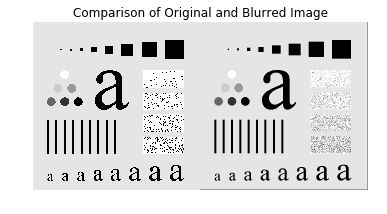

In [33]:
result = np.hstack((image1,blurred_img1))
plt.title("Comparison of Original and Blurred Image")
plt.axis('off')
plt.imshow(result, cmap = "gray");

In [34]:
"""
Discussion of the Results obtained and the Reason why:

we have obtained an image with less noise and less high frequency detail, with
small objects eventually eliminated from the image the more we reduce noises.
"""

'\nDiscussion of the Results obtained and the Reason why:\n\nwe have obtained an image with less noise and less high frequency detail, with\nsmall objects eventually eliminated from the image the more we reduce noises.\n'

In [35]:
""" Implement 2D Laplacian filter on greyscale image 
This is a laplacian operator / 2nd order derivative in x and y directions.
"""
laplacian_filter = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])

In [36]:
sharpened_img1 = convolution(image2, laplacian_filter)

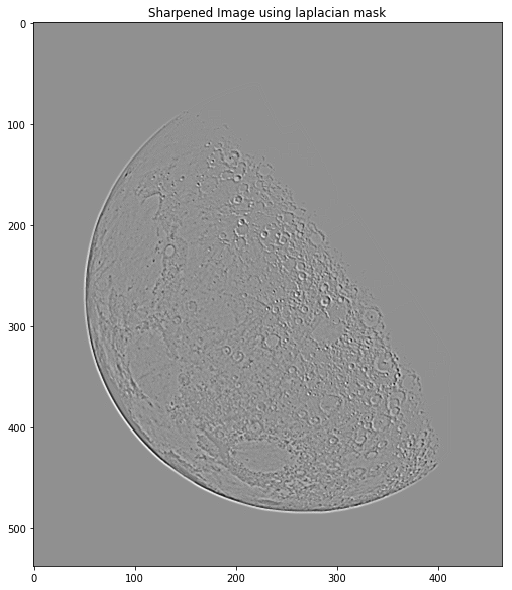

In [37]:
plt.figure(figsize=(10,10))
plt.title('Sharpened Image using laplacian mask')
plt.imshow(sharpened_img1, cmap = "gray");

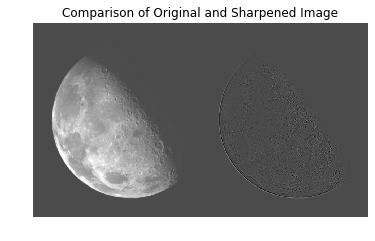

In [38]:
result3 = np.hstack((image2,sharpened_img1))
plt.title("Comparison of Original and Sharpened Image")
plt.axis('off')
plt.imshow(result3, cmap = "gray");

In [39]:
"""
Effects of Applying the Laplacian Filter:

By applying the Laplacian filter, we are highlighting the edge details
of this moon image. So we have highlighted transitions in intensity.

Large sections of this image are black because the Laplacian 
contains both positive and negative values, and all negative values
are clipped at 0.

In Laplacian operation, for edge details, it will give significantly 
strong edge responses at the begining and end of 'ramp' 
and 'step' regions. Bright ends will have a negative response and 
dark ends will have a positive response.

"""

"\nEffects of Applying the Laplacian Filter:\n\nBy applying the Laplacian filter, we are highlighting the edge details\nof this moon image. So we have highlighted transitions in intensity.\n\nLarge sections of this image are black because the Laplacian \ncontains both positive and negative values, and all negative values\nare clipped at 0.\n\nIn Laplacian operation, for edge details, it will give significantly \nstrong edge responses at the begining and end of 'ramp' \nand 'step' regions. Bright ends will have a negative response and \ndark ends will have a positive response.\n\n"

In [40]:
"""
Discussion of which structures are extracted and the reason why:

The Laplacian is a 2D isotropic linear measure of the 
2nd spatial derivative of an image.

The Laplacian of an image highlights the areas/regions of rapid changes in
intensity and is therefore often used for edge detection.
Here, the edge structure details are extracted.

The discrete approximation of the Laplacian at a specific pixel can be 
determined by taking the weighted mean of the pixel intensities in a 
small neighbourhood of the pixel.

Because the Laplacian is a derivative operator, 
its use has highlighted intensity discontinuities in this image 
and deemphasized regions with slowly varying intensity levels,
producing image that has grayish edge lines and
other discontinuities, all superimposed on a dark, featureless background.
"""

'\nDiscussion of which structures are extracted and the reason why:\n\nThe Laplacian is a 2D isotropic linear measure of the \n2nd spatial derivative of an image.\n\nThe Laplacian of an image highlights the areas/regions of rapid changes in\nintensity and is therefore often used for edge detection.\nHere, the edge structure details are extracted.\n\nThe discrete approximation of the Laplacian at a specific pixel can be \ndetermined by taking the weighted mean of the pixel intensities in a \nsmall neighbourhood of the pixel.\n\nBecause the Laplacian is a derivative operator, \nits use has highlighted intensity discontinuities in this image \nand deemphasized regions with slowly varying intensity levels,\nproducing image that has grayish edge lines and\nother discontinuities, all superimposed on a dark, featureless background.\n'